In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/DL/AIRBUS-ShipDetection

In [8]:
import os
import sys
sys.path.insert(0, "..")
import gc
gc.enable()

In [9]:
from utils.DataLoader import DataLoader
from utils.utilities import *
from utils.visualization import *
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

tf.debugging.set_log_device_placement(True)
dl = DataLoader()

Num GPUs Available:  1


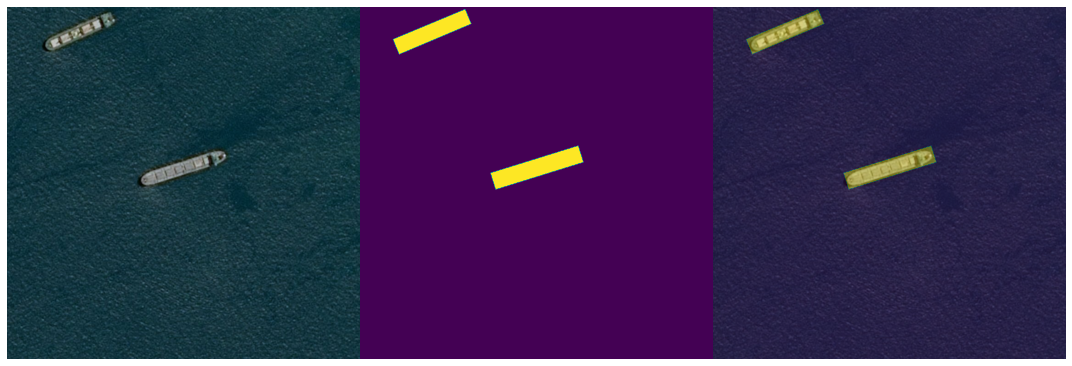

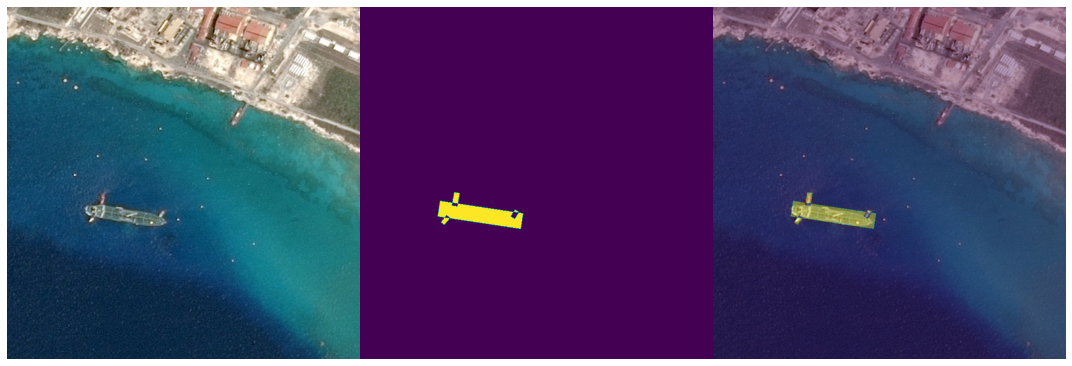

In [10]:
img_id1 = "b4b8c1c14.jpg"
img_id2 = "b4e432c6c.jpg"
img1 = dl.get_image(img_id1)
img2 = dl.get_image(img_id2)
plot_masks(img1, dl.get_masks(img_id1))
plot_masks(img2, dl.get_masks(img_id2))

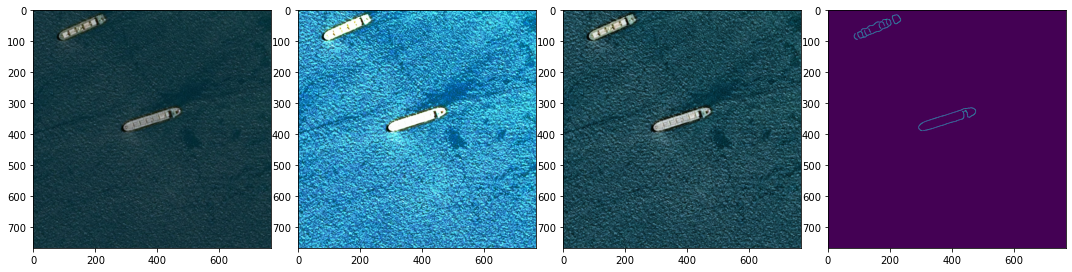

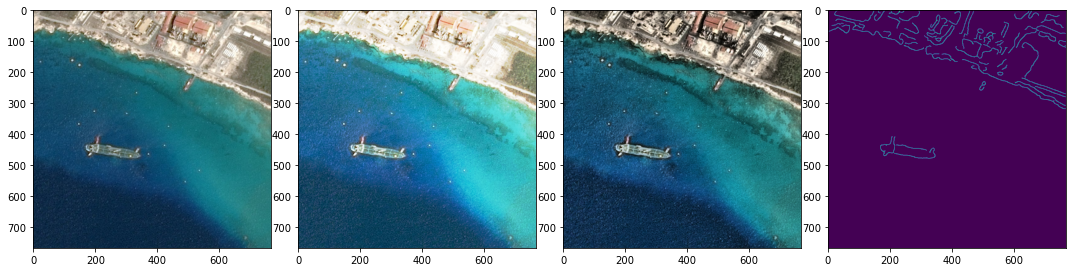

In [11]:
eq_img1 = apply_filter(img1)
adeq_img1 = apply_filter(img1, "adaptive_equalization")
#sobel_img1 = apply_filter(img1, "sobel_op")
canny_img1 = apply_filter(img1, "canny_feature")
multiplot_images(1, 4, img1, eq_img1, adeq_img1, canny_img1)

eq_img2 = apply_filter(img2)
adeq_img2 = apply_filter(img2, "adaptive_equalization")
#sobel_img2 = apply_filter(img2, "sobel_op")
canny_img2 = apply_filter(img2, "canny_feature")
multiplot_images(1, 4, img2, eq_img2, adeq_img2, canny_img2)

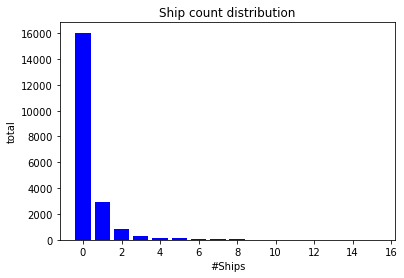

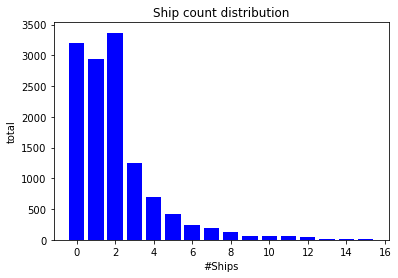

In [12]:
plot_ships_frequencies(dl.train)

adjusted_set = dl.adjust_set()
plot_ships_frequencies(adjusted_set)

In [13]:
grouped_images_gen = dl.get_grouped_images_gen(adjusted_set)
aug_gen = get_augmented_images_generator(grouped_images_gen)

Images batches as montage
Augmentation results


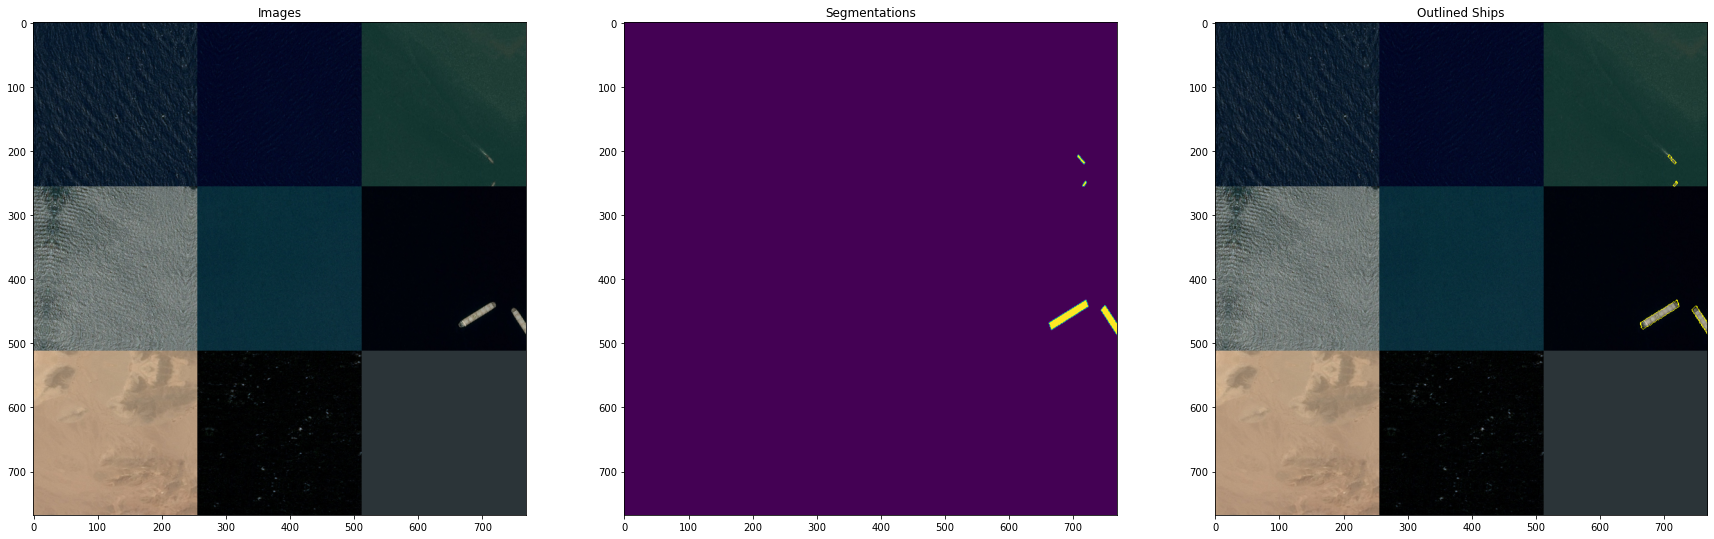

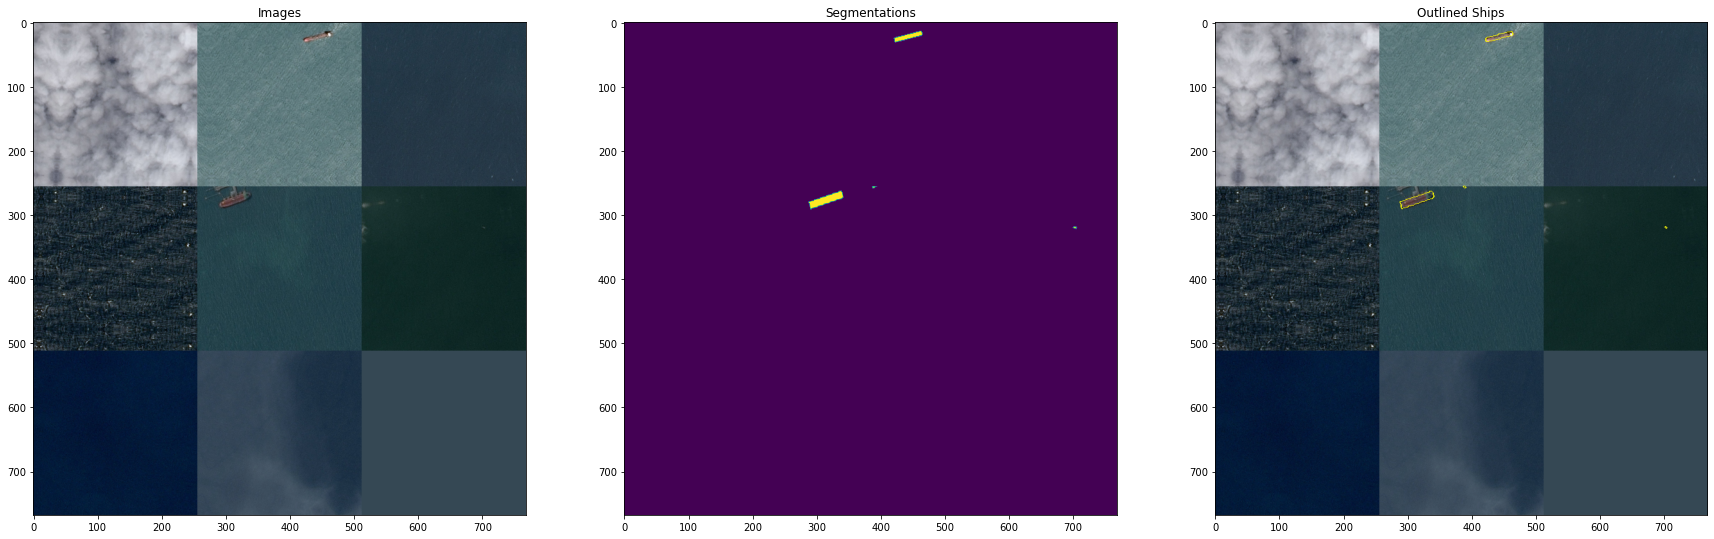

In [14]:
print("Images batches as montage")
train_x, train_y = next(aug_gen)
plot_masks(train_x[6], train_y[6])

plot_as_montage(train_x, train_y)

print("Augmentation results")
t_x, t_y = next(aug_gen)
# only keep first 9 samples to examine in detail
t_x = t_x[:9]
t_y = t_y[:9]
plot_as_montage(t_x, t_y)
